<a href="https://colab.research.google.com/github/bobxia83/TA/blob/main/Daily_SP500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install yfinance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 62.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [5]:
pip install ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
pip install backtrader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.1/410.1 KB 8.9 MB/s eta 0:00:00


In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import ta
import backtrader as bt
import matplotlib.pyplot as plt


Data

In [8]:
# Define the list of tickers
ticker = ["^GSPC"]



In [9]:
# Download the data
df = yf.download(ticker, start="1990-01-01", end="2022-12-31")


high = df.High
low = df.Low
close = df.Close
volume = df.Volume




  

[*********************100%***********************]  1 of 1 completed


In [44]:
# Trend Indicators

# EMA
df['EMA50'] = ta.trend.EMAIndicator(close, 50).ema_indicator()
df['EMA100'] = ta.trend.EMAIndicator(close, 100).ema_indicator()
df['EMA200'] = ta.trend.EMAIndicator(close, 200).ema_indicator()

# SMA
df['SMA10'] = ta.trend.SMAIndicator(close, 10).sma_indicator()
df['SMA20'] = ta.trend.SMAIndicator(close, 20).sma_indicator()
df['SMA50'] = ta.trend.SMAIndicator(close, 50).sma_indicator()
df['SMA100'] = ta.trend.SMAIndicator(close, 100).sma_indicator()
df['SMA200'] = ta.trend.SMAIndicator(close, 200).sma_indicator()

# ADX - Average Directional Movement Index, measures the strength of a trend, without regard to its direction.
# ADX is a line that oscillates between 0 and 100, with values above 25 indicating a strong trend, and values below 20 indicating a weak trend or no trend at all. 
ADX_n = 14
ADX_Strong = 25
ADX_Weak = 20
df['ADX_Neg'] = ta.trend.ADXIndicator(high, low, close,ADX_n).adx_neg()
df['ADX_Pos'] = ta.trend.ADXIndicator(high, low, close,ADX_n).adx_pos()
df['ADX'] = ta.trend.ADXIndicator(high, low, close,ADX_n).adx()
df['Signal_ADX_Confirm'] = np.where(df.ADX > ADX_Strong, 1, 0)


# Aroon Indicator, Identify when trends are likely to change direction.
# The Aroon Up measures the number of periods since the highest high, while the Aroon Down measures the number of periods since the lowest low.
# An Aroon Up value of 100 indicates that the current high is the highest high over the specified period, while an Aroon Down value of 100 indicates that the current low is the lowest low over the specified period.
# When Aroon Up value is more than Aroon down that means uptrend is strong and vice-versa.
# crossovers between the two indicators identify potential trend reversals
## A buy signal is generated when the Aroon Up crosses above the Aroon Down, indicating that an uptrend is beginning, and a sell signal is generated when the Aroon Up crosses below the Aroon Down, indicating that a downtrend is beginning.
## Buy or sell when the Aroon Up or Aroon Down reaches a certain level:70
Aroon_n = 25
Aroon_Level = 70
df['Aroon_Down'] = ta.trend.AroonIndicator(close, Aroon_n).aroon_down()
df['Aroon_Up'] = ta.trend.AroonIndicator(close, Aroon_n).aroon_up()
df['Aroon'] = ta.trend.AroonIndicator(close, Aroon_n).aroon_indicator()

df['Signal_Aroon_Cross'] = np.where(df.Aroon_Up > df.Aroon_Down, "Buy", "Sell")
df['Signal_Aroon_Level_Buy'] = np.where(df.Aroon_Up > Aroon_Level, 1, 0)
df['Signal_Aroon_Level_Sell'] = np.where(df.Aroon_Down > Aroon_Level, 1, 0)




# CCI - Commodity Channel Index, measures the difference between a security’s price change and its average price change, used to identify overbought and oversold conditions
# A positive CCI indicates that the security is trading above its statistical mean, which is considered to be an overbought condition.
# A buy signal is generated when the CCI crosses above +100, and a sell signal is generated when the CCI crosses below -100. 
CCI_Level_Buy = 100
CCI_Level_Sell = -100
df['CCI'] = ta.trend.CCIIndicator(high, low, close, 20).cci()

df['Signal_CCI_Buy'] = np.where(df.CCI > CCI_Level_Buy, 1,0)
df['Signal_CCI_Sell'] = np.where(df.CCI < CCI_Level_Sell, 1,0)


# Ichimoku,  is composed of five different lines, each with its own unique purpose
# The Tenkan-sen line, also known as the Conversion Line, is a measure of the market's short-term trend. It is calculated by taking the average of the highest high and the lowest low over the past 9 periods.
# The Kijun-sen line, also known as the Base Line, is a measure of the market's medium-term trend. It is calculated by taking the average of the highest high and the lowest low over the past 26 periods.
# The Senkou Span A, also known as the Leading Span A, is a measure of the market's short-term future. It is calculated by taking the average of the Tenkan-sen and Kijun-sen lines and plotting it 26 periods ahead.
# The Senkou Span B, also known as the Leading Span B, is a measure of the market's long-term trend. It is calculated by taking the average of the highest high and the lowest low over the past 52 periods and plotting it 26 periods ahead.
#  The Chikou Span, also known as the Lagging Span, is a measure of the market's current price. It is calculated by plotting the closing price 26 periods behind.
df['Ichimoku_a'] = ta.trend.IchimokuIndicator(high, low, 9, 26, 52).ichimoku_a()
df['Ichimoku_b'] = ta.trend.IchimokuIndicator(high, low, 9, 26, 52).ichimoku_b()
df['Ichimoku_Base'] = ta.trend.IchimokuIndicator(high, low, 9, 26, 52).ichimoku_base_line()
df['Ichimoku_Conv'] = ta.trend.IchimokuIndicator(high, low, 9, 26, 52).ichimoku_conversion_line()

#df.Ichimoku_a = df.Ichimoku_a.reindex(close.index)
#df.Ichimoku_b = df.Ichimoku_b.reindex(close.index)

df['Signal_Ichimoku_Buy_1'] = np.where(df.Ichimoku_Conv > df.Ichimoku_Base, 1, 0)
#df['Signal_Ichimoku_Buy_2'] = np.where((close > df.Ichimoku_a) & (df.Ichimoku_a > df.Ichimoku_b), 1, 0)
df['Signal_Ichimoku_Sell_1'] = np.where(df.Ichimoku_Conv < df.Ichimoku_Base, 1, 0)
#df['Signal_Ichimoku_Sell_2'] = np.where((close < df.Ichimoku_a) & (df.Ichimoku_a < df.Ichimoku_b))

  
# KST (Know Sure Thing) , identify major stock market cycle junctures because its formula is weighed to be more greatly influenced by the longer and more dominant time spans, in order to better reflect the primary swings of stock market cycle
# The indicator is a combination of four other indicators: the rate of change (ROC), the moving average (MA), the relative strength index (RSI), and the moving average convergence divergence (MACD). 
# ta.trend.KSTIndicator(close: pandas.core.series.Series, roc1: int = 10, roc2: int = 15, roc3: int = 20, roc4: int = 30, window1: int = 10, window2: int = 10, window3: int = 10, window4: int = 15, nsig: int = 9, fillna: bool = False)

roc1 = 10   # The time periods (in number of periods) for the rate of change (ROC) calculations
roc2 = 15
roc3 = 20
roc4 = 40
smooth1 = 10    # The time periods (in number of periods) for the moving average (MA) calculations
smooth2 = 10
smooth3 = 10
smooth4 = 15
signal_kst = 9    # The time period (in number of periods) for the signal line calculation

kst = ta.trend.KSTIndicator(close, roc1, roc2, roc3, roc4, smooth1, smooth2, smooth3, smooth4, signal_kst)

df['KST'] = kst.kst()
df['KST_Diff'] = kst.kst_diff()
df['KST_Sig'] = kst.kst_sig()

roc = ta.momentum.ROCIndicator(close, 12).roc()  # can also use other indicators like RSI, Stochastic, etc. along with KST indicator to confirm the trading signals. 

df['Signal_KST_ROC_Buy'] = (kst.kst() > kst.kst_sig()) & (roc > 0)
df['Signal_KST_ROC_Sell'] = (kst.kst() < kst.kst_sig()) & (roc < 0)




# MACD - Moving Average Convergence Divergence, shows the relationship between two moving averages
# It is calculated by subtracting the 26-day exponential moving average (EMA) from the 12-day EMA. The resulting line is then compared to a 9-day EMA of the difference (the "signal line"), which is used as a trigger for buy and sell signals.
# ta.trend.MACD(close: pandas.core.series.Series, window_slow: int = 26, window_fast: int = 12, window_sign: int = 9, fillna: bool = False)
df['MACD'] = ta.trend.MACD(close, 26, 12, 9).macd()
df['MACD_Diff'] = ta.trend.MACD(close, 26, 12, 9).macd_diff()
df['MACD_Sig'] = ta.trend.MACD(close, 26, 12, 9).macd_signal()

df['Signal_MACD'] = np.where(df.MACD > df.MACD_Sig, 1, -1)  # buy = 1, sell = -1

# Detrended Price Oscillator (DPO), Is an indicator designed to remove trend from price and make it easier to identify cycles.
# ta.trend.DPOIndicator(close: pandas.core.series.Series, window: int = 20, fillna: bool = False)
df['DPO'] = ta.trend.DPOIndicator(close, 20).dpo()

# Mass Index (MI),  uses the high-low range to identify trend reversals based on range expansions. It identifies range bulges that can foreshadow a reversal of the current trend.
# ta.trend.MassIndex(high: pandas.core.series.Series, low: pandas.core.series.Series, window_fast: int = 9, window_slow: int = 25, fillna: bool = False)
df['MI'] = ta.trend.MassIndex(high, low, 9, 25).mass_index()


# Parabolic Stop and Reverse (Parabolic SAR), is displayed as a single parabolic line (or dots) underneath the price bars in an uptrend, and above the price bars in a downtrend.
# ta.trend.PSARIndicator(high: pandas.core.series.Series, low: pandas.core.series.Series, close: pandas.core.series.Series, step: float = 0.02, max_step: float = 0.2, fillna: bool = False)
df['PSAR'] = ta.trend.PSARIndicator(high, low, close, 0.02, 0.2).psar()
df['PSAR_Down'] = ta.trend.PSARIndicator(high, low, close, 0.02, 0.2).psar_down()
df['PSAR_Down_Indicator'] = ta.trend.PSARIndicator(high, low, close, 0.02, 0.2).psar_down_indicator()
df['PSAR_Up'] = ta.trend.PSARIndicator(high, low, close, 0.02, 0.2).psar_up()
df['PSAR_Up_Indicator'] = ta.trend.PSARIndicator(high, low, close, 0.02, 0.2).psar_up_indicator()



# Schaff Trend Cycle (STC),  identify market trends and provide buy and sell signals, is a type of oscillator and is based on the assumption that, regardless of time frame, currency trends accelerate and decelerate in cyclical patterns
# ta.trend.STCIndicator(close: pandas.core.series.Series, window_slow: int = 50, window_fast: int = 23, cycle: int = 10, smooth1: int = 3, smooth2: int = 3, fillna: bool = False)
df['STC'] = ta.trend.STCIndicator(close, 50, 23, 10, 3, 3).stc()

# Trix (TRIX), Shows the percent rate of change of a triple exponentially smoothed moving average.
# ta.trend.TRIXIndicator(close: pandas.core.series.Series, window: int = 15, fillna: bool = False)
df['TRIX'] = ta.trend.TRIXIndicator(close, 15).trix()


# Vortex Indicator (VI), It consists of two oscillators that capture positive and negative trend movement. A bullish signal triggers when the positive trend indicator crosses above the negative trend indicator or a key level.
# ta.trend.VortexIndicator(high: pandas.core.series.Series, low: pandas.core.series.Series, close: pandas.core.series.Series, window: int = 14, fillna: bool = False)
df['Diff_VI'] = ta.trend.VortexIndicator(high, low, close, 14).vortex_indicator_diff()
df['Neg_VI'] = ta.trend.VortexIndicator(high, low, close, 14).vortex_indicator_neg()
df['Pos_VI'] = ta.trend.VortexIndicator(high, low, close, 14).vortex_indicator_pos()


# WMA - Weighted Moving Average
# ta.trend.WMAIndicator(close: pandas.core.series.Series, window: int = 9, fillna: bool = False)
df['WMA'] = ta.trend.WMAIndicator(close, 9).wma()




/usr/local/lib/python3.8/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.8/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


<Figure size 2160x1080 with 0 Axes>

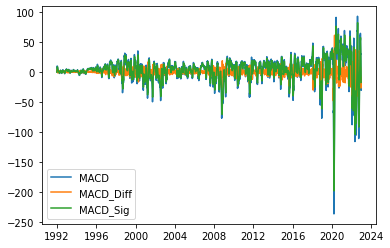

In [45]:
plt.figure(figsize=(30,15))
fig, ax = plt.subplots()
ax.plot(df['MACD'], label='MACD')
ax.plot(df['MACD_Diff'], label='MACD_Diff')
ax.plot(df['MACD_Sig'], label='MACD_Sig')
ax.legend(loc='best')
plt.show()

In [11]:
# Momentum Indicators


# Awesome Oscillator, calculates the difference of a 34 Period and 5 Period Simple Moving Averages. The Simple Moving Averages that are used are not calculated using closing price but rather each bar’s midpoints. AO is generally used to affirm trends or to anticipate possible reversals.
# ta.momentum.AwesomeOscillatorIndicator(high: pandas.core.series.Series, low: pandas.core.series.Series, window1: int = 5, window2: int = 34, fillna: bool = False)
df['AO'] = ta.momentum.AwesomeOscillatorIndicator(high, low, 5,34).awesome_oscillator()


# Kaufman’s Adaptive Moving Average (KAMA), Moving average designed to account for market noise or volatility, can be used to identify the overall trend, time turning points and filter price movements.
# ta.momentum.KAMAIndicator(close: pandas.core.series.Series, window: int = 10, pow1: int = 2, pow2: int = 30, fillna: bool = False)
df['KAMA'] = ta.momentum.KAMAIndicator(close, 10, 2, 30).kama()


# The Percentage Price Oscillator (PPO) , measures the difference between two moving averages as a percentage of the larger moving average.
# ta.momentum.PercentagePriceOscillator(close: pandas.core.series.Series, window_slow: int = 26, window_fast: int = 12, window_sign: int = 9, fillna: bool = False)
df['PPO'] = ta.momentum.PercentagePriceOscillator(close, 26, 12, 9).ppo()
df['PPO_Hist'] = ta.momentum.PercentagePriceOscillator(close, 26, 12, 9).ppo_hist()
df['PPO_Signal'] = ta.momentum.PercentagePriceOscillator(close, 26, 12, 9).ppo_signal()


# The Percentage Volume Oscillator (PVO), is a momentum oscillator for volume. measures the difference between two volume-based moving averages as a percentage of the larger moving average.
# ta.momentum.PercentageVolumeOscillator(volume: pandas.core.series.Series, window_slow: int = 26, window_fast: int = 12, window_sign: int = 9, fillna: bool = False)
df['PVO'] = ta.momentum.PercentageVolumeOscillator(volume, 26, 12, 5).pvo()
df['PVO_Hist'] = ta.momentum.PercentageVolumeOscillator(volume, 26, 12, 5).pvo_hist()
df['PVO_Signal'] = ta.momentum.PercentageVolumeOscillator(volume, 26, 12, 5).pvo_signal()

# Rate of Change (ROC)
# ta.momentum.ROCIndicator(close: pandas.core.series.Series, window: int = 12, fillna: bool = False)
df['ROC'] = ta.momentum.ROCIndicator(close, 12).roc()


# Relative Strength Index (RSI)
# ta.momentum.RSIIndicator(close: pandas.core.series.Series, window: int = 14, fillna: bool = False)
df['RSI'] = ta.momentum.RSIIndicator(close, 14).rsi()

# Stochastic RSI, a more sensitive indicator that is attuned to a specific security’s historical performance rather than a generalized analysis of price change
# ta.momentum.StochRSIIndicator(close: pandas.core.series.Series, window: int = 14, smooth1: int = 3, smooth2: int = 3, fillna: bool = False)
df['Stoch_RSI'] = ta.momentum.StochRSIIndicator(close, 14, 3, 3).stochrsi()
df['Stoch_RSI_D'] = ta.momentum.StochRSIIndicator(close, 14, 3, 3).stochrsi_d()
df['Stoch_RSI_K'] = ta.momentum.StochRSIIndicator(close, 14, 3, 3).stochrsi_k()


# Stochastic Oscillator,  presents the location of the closing price of a stock in relation to the high and low range of the price of a stock over a period of time, typically a 14-day period.
# ta.momentum.StochasticOscillator(high: pandas.core.series.Series, low: pandas.core.series.Series, close: pandas.core.series.Series, window: int = 14, smooth_window: int = 3, fillna: bool = False)
df['Stoch'] = ta.momentum.StochasticOscillator(high, low, close, 14, 3).stoch()
df['Stoch_Sig'] = ta.momentum.StochasticOscillator(high, low, close, 14, 3).stoch_signal()


# True strength index (TSI), Shows both trend direction and overbought/oversold conditions.
# ta.momentum.TSIIndicator(close: pandas.core.series.Series, window_slow: int = 25, window_fast: int = 13, fillna: bool = False)
df['TSI'] = ta.momentum.TSIIndicator(close, 25, 13).tsi()

# Ultimate Oscillator,  designed to capture momentum across three different timeframes.
# ta.momentum.UltimateOscillator(high: pandas.core.series.Series, low: pandas.core.series.Series, close: pandas.core.series.Series, window1: int = 7, window2: int = 14, window3: int = 28, weight1: float = 4.0, weight2: float = 2.0, weight3: float = 1.0, fillna: bool = False)
df['Ult_Oscillator'] = ta.momentum.UltimateOscillator(high, low, close, 7, 14, 28, 4, 2, 1).ultimate_oscillator() 

# Williams %R
# ta.momentum.WilliamsRIndicator(high: pandas.core.series.Series, low: pandas.core.series.Series, close: pandas.core.series.Series, lbp: int = 14, fillna: bool = False)
df['Williams_R'] = ta.momentum.WilliamsRIndicator(high, low, close, 14).williams_r()





In [12]:
# Volume Indicators

# Accumulation/Distribution Index (ADI), Acting as leading indicator of price movements.
# ta.volume.AccDistIndexIndicator(high: pandas.core.series.Series, low: pandas.core.series.Series, close: pandas.core.series.Series, volume: pandas.core.series.Series, fillna: bool = False)
df['ADI'] = ta.volume.AccDistIndexIndicator(high, low, close, volume).acc_dist_index()


# Chaikin Money Flow (CMF), measures the amount of Money Flow Volume over a specific period.
# ta.volume.ChaikinMoneyFlowIndicator(high: pandas.core.series.Series, low: pandas.core.series.Series, close: pandas.core.series.Series, volume: pandas.core.series.Series, window: int = 20, fillna: bool = False)
df['CMF'] = ta.volume.ChaikinMoneyFlowIndicator(high, low, close, volume).chaikin_money_flow()

# Ease of movement (EoM, EMV), It relate an asset’s price change to its volume and is particularly useful for assessing the strength of a trend.
# ta.volume.EaseOfMovementIndicator(high: pandas.core.series.Series, low: pandas.core.series.Series, volume: pandas.core.series.Series, window: int = 14, fillna: bool = False)
df['EoM'] = ta.volume.EaseOfMovementIndicator(high, low, volume, 14).ease_of_movement()
df['EMV'] = ta.volume.EaseOfMovementIndicator(high, low, volume, 14).sma_ease_of_movement()


# Force Index (FI), illustrates how strong the actual buying or selling pressure is. High positive values mean there is a strong rising trend, and low values signify a strong downward trend
# ta.volume.ForceIndexIndicator(close: pandas.core.series.Series, volume: pandas.core.series.Series, window: int = 13, fillna: bool = False)
df['FI'] = ta.volume.ForceIndexIndicator(close, volume, 13).force_index()

# Money Flow Index (MFI)
# Uses both price and volume to measure buying and selling pressure. It is positive when the typical price rises (buying pressure) and negative when the typical price declines (selling pressure). A ratio of positive and negative money flow is then plugged into an RSI formula to create an oscillator that moves between zero and one hundred.
# ta.volume.MFIIndicator(high: pandas.core.series.Series, low: pandas.core.series.Series, close: pandas.core.series.Series, volume: pandas.core.series.Series, window: int = 14, fillna: bool = False)
df['MFI'] = ta.volume.MFIIndicator(high, low, close, volume, 14).money_flow_index()


# Negative Volume Index (NVI)
# ta.volume.NegativeVolumeIndexIndicator(close: pandas.core.series.Series, volume: pandas.core.series.Series, fillna: bool = False)
df['NVI'] = ta.volume.NegativeVolumeIndexIndicator(close, volume).negative_volume_index()


# On-balance volume (OBV), It relates price and volume in the stock market. OBV is based on a cumulative total volume.
# ta.volume.OnBalanceVolumeIndicator(close: pandas.core.series.Series, volume: pandas.core.series.Series, fillna: bool = False)
df['OBV'] = ta.volume.OnBalanceVolumeIndicator(close, volume).on_balance_volume()

# Volume-price trend (VPT)
# Is based on a running cumulative volume that adds or substracts a multiple of the percentage change in share price trend and current volume, depending upon the investment’s upward or downward movements.
# ta.volume.VolumePriceTrendIndicator(close: pandas.core.series.Series, volume: pandas.core.series.Series, fillna: bool = False)
df['VPT'] = ta.volume.VolumePriceTrendIndicator(close, volume).volume_price_trend()


# Volume Weighted Average Price (VWAP)
# VWAP equals the dollar value of all trading periods divided by the total trading volume for the current day. The calculation starts when trading opens and ends when it closes. Because it is good for the current trading day only, intraday periods and data are used in the calculation.
# ta.volume.VolumeWeightedAveragePrice(high: pandas.core.series.Series, low: pandas.core.series.Series, close: pandas.core.series.Series, volume: pandas.core.series.Series, window: int = 14, fillna: bool = False)
df['VWAP'] = ta.volume.VolumeWeightedAveragePrice(high, low, close, volume, 14).volume_weighted_average_price()






In [13]:
# Volatility Indicators


# Average True Range (ATR)
# The indicator provide an indication of the degree of price volatility. Strong moves, in either direction, are often accompanied by large ranges, or large True Ranges.
# ta.volatility.AverageTrueRange(high: pandas.core.series.Series, low: pandas.core.series.Series, close: pandas.core.series.Series, window: int = 14, fillna: bool = False)
df['ATR'] = ta.volatility.AverageTrueRange(high, low, close, 14).average_true_range()


# Bollinger Bands
# ta.volatility.BollingerBands(close: pandas.core.series.Series, window: int = 20, window_dev: int = 2, fillna: bool = False)
df['Bollinger_H'] = ta.volatility.BollingerBands(close, 20, 2).bollinger_hband()
df['Bollinger_HI'] = ta.volatility.BollingerBands(close, 20, 2).bollinger_hband_indicator() #It returns 1, if close is higher than bollinger_hband. Else, it returns 0.
df['Bollinger_L'] = ta.volatility.BollingerBands(close, 20, 2).bollinger_lband()
df['Bollinger_LI'] = ta.volatility.BollingerBands(close, 20, 2).bollinger_lband_indicator() #It returns 1, if close is lower than bollinger_lband. Else, it returns 0.
df['Bollinger_M'] = ta.volatility.BollingerBands(close, 20, 2).bollinger_mavg()
df['Bollinger_P'] = ta.volatility.BollingerBands(close, 20, 2).bollinger_pband()
df['Bollinger_W'] = ta.volatility.BollingerBands(close, 20, 2).bollinger_wband()

# Donchian Channel
# ta.volatility.DonchianChannel(high: pandas.core.series.Series, low: pandas.core.series.Series, close: pandas.core.series.Series, window: int = 20, offset: int = 0, fillna: bool = False)
df['Donchian_H'] = ta.volatility.DonchianChannel(high, low, close, 20, 0).donchian_channel_hband()
df['Donchian_L'] = ta.volatility.DonchianChannel(high, low, close, 20, 0).donchian_channel_lband()
df['Donchian_M'] = ta.volatility.DonchianChannel(high, low, close, 20, 0).donchian_channel_mband()
df['Donchian_P'] = ta.volatility.DonchianChannel(high, low, close, 20, 0).donchian_channel_pband()
df['Donchian_W'] = ta.volatility.DonchianChannel(high, low, close, 20, 0).donchian_channel_wband()


# Keltner Channels
# ta.volatility.KeltnerChannel(high: pandas.core.series.Series, low: pandas.core.series.Series, close: pandas.core.series.Series, window: int = 20, window_atr: int = 10, fillna: bool = False, original_version: bool = True, multiplier: int = 2)
df['Keltner_H'] = ta.volatility.KeltnerChannel(high, low, close, 20, 10, True, 2).keltner_channel_hband()
df['Keltner_HI'] = ta.volatility.KeltnerChannel(high, low, close, 20, 10, True, 2).keltner_channel_hband_indicator()
df['Keltner_L'] = ta.volatility.KeltnerChannel(high, low, close, 20, 10, True, 2).keltner_channel_lband()
df['Keltner_LI'] = ta.volatility.KeltnerChannel(high, low, close, 20, 10, True, 2).keltner_channel_lband_indicator()
df['Keltner_M'] = ta.volatility.KeltnerChannel(high, low, close, 20, 10, True, 2).keltner_channel_mband()
df['Keltner_P'] = ta.volatility.KeltnerChannel(high, low, close, 20, 10, True, 2).keltner_channel_pband()
df['Keltner_W'] = ta.volatility.KeltnerChannel(high, low, close, 20, 10, True, 2).keltner_channel_wband()


# Ulcer Index
# ta.volatility.UlcerIndex(close: pandas.core.series.Series, window: int = 14, fillna: bool = False)
df['Ulcer'] = ta.volatility.UlcerIndex(close, 14).ulcer_index()





In [46]:
# assuming your dataframe is named df, remove the top 500 lines so no NAs

#df = df.drop(df.index[:500])


#for column in df.columns:
 #   plt.figure()
  #  plt.plot(df.index, df[column])
   # plt.xlabel("Date")
    #plt.ylabel(column)
    #plt.title(column)

#plt.show()





import matplotlib.backends.backend_pdf

pdf_pages = matplotlib.backends.backend_pdf.PdfPages("C:/Users/AI Xia/SynologyDrive/Documents/Summer Fund/Data/file.pdf")

for column in df.columns:
    plt.figure()
    plt.plot(df.index, df[column])
    plt.xlabel("Date")
    plt.ylabel(column)
    plt.title(column)
    pdf_pages.savefig()

    
pdf_pages.close()

In [47]:
# Save the data to a CSV file on the network drive
df.to_csv('sample.csv', index=True)

from google.colab import files
files.download('sample.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>